In [1]:
%matplotlib inline

In [2]:
# Import Dependencies
import json
import requests
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Import csv file and make DataFrame
uber_data = Path("../Resources/Uber_Project_CSV.csv")
uber_df = pd.read_csv(uber_data)
uber_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [4]:
#Import URL and API CSV file
#url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/new%2520york%2520city/2015-01-01/2015-06-30?elements=datetime%2CdatetimeEpoch%2Ctemp%2Ctempmax%2Ctempmin%2Cprecip%2Cwindspeed%2Cwindgust%2Cfeelslike%2Cfeelslikemax%2Cfeelslikemin%2Cpressure%2Cstations%2Cdegreedays%2Caccdegreedays&include=fcst%2Cobs%2Chistfcst%2Cstats%2Chours&key=9R8U63UTPUJVYD92WRCVMZZXB&options=preview&contentType=json"
weather_api = Path("../Resources/NYC_Weather_API_data.csv")
weather_df= pd.read_csv(weather_api)
weather_df.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,new york city,1/1/2015,38.7,27.3,32.8,35.8,17.1,25.6,9.6,37.7,...,9.9,5,NaN,2015-01-01T07:20:09,2015-01-01T16:39:07,0.38,Clear,Clear conditions throughout the day.,clear-day,"72505394728,KLGA,KNYC,72503014732"
1,new york city,1/2/2015,42.2,36.0,38.6,36.5,28.1,32.2,16.8,41.0,...,9.5,5,NaN,2015-01-02T07:20:15,2015-01-02T16:39:58,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"
2,new york city,1/3/2015,40.7,33.5,35.8,35.0,25.9,30.2,26.1,69.4,...,5.2,3,NaN,2015-01-03T07:20:19,2015-01-03T16:40:50,0.45,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72505394728,KLGA,KNYC,72503014732"
3,new york city,1/4/2015,55.4,41.0,48.2,55.4,36.6,46.6,44.6,87.4,...,3.8,3,NaN,2015-01-04T07:20:20,2015-01-04T16:41:44,0.50,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"72505394728,KLGA,KNYC,72503014732"
4,new york city,1/5/2015,50.3,21.8,36.3,50.3,11.4,27.8,12.2,37.1,...,9.9,5,NaN,2015-01-05T07:20:19,2015-01-05T16:42:40,0.52,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"


In [17]:
# Does Wind Speed affect the number of pickups? How does wind with or without precipitation affect it? - Ryan
uber_df=uber_df.astype({"pickup_dt":"datetime64[D]"})

# Does Wind Speed affect the number of pickups? How does wind with or without precipitation affect it? - Ryan
wind_df= uber_df[["pickup_dt", "borough", "pickups", "spd", "pcp01"]]
wind_df= wind_df.rename(columns={"pickup_dt": "Date of Observation"}|{"borough":"Borough"}|{"pickups":"Number of Pickups"}|{"spd":"Wind Speed"}|{"pcp01":"Precipitaion Amount"})

wind_df.head()



,Date of Observation,Borough,Number of Pickups,Wind Speed,Precipitaion Amount
0,2015-01-01,Bronx,152,5.0,0.0
1,2015-01-01,Brooklyn,1519,5.0,0.0
2,2015-01-01,EWR,0,5.0,0.0
3,2015-01-01,Manhattan,5258,5.0,0.0
4,2015-01-01,Queens,405,5.0,0.0


In [18]:
#toatl number of pickups and average wind speed per date

converted_wind_df= wind_df[["Borough", "Number of Pickups", "Wind Speed", "Precipitaion Amount", "Date of Observation"]]
converted_wind_df= converted_wind_df.groupby("Date of Observation").agg({"Number of Pickups": "sum", "Wind Speed": "mean"}).reindex()
converted_wind_df.head()

,Number of Pickups,Wind Speed
Date of Observation,,
2015-01-01,54671,6.065359
2015-01-02,39668,7.582278
2015-01-03,59244,6.243438
2015-01-04,43230,5.645541
2015-01-05,43591,10.898089


The r-value is: -0.22577964333481676


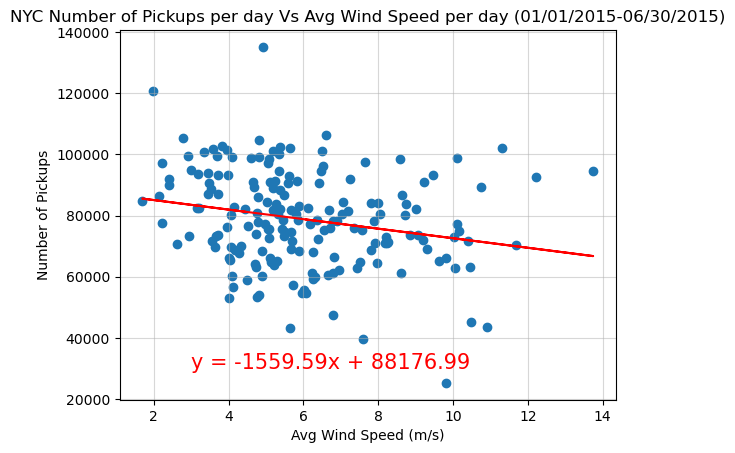

In [19]:
#plt.scatter(converted_wind_df["Wind Speed"], converted_wind_df["Number of Pickups"], edgecolors= "black", marker="o")
x_values= converted_wind_df["Wind Speed"]
y_values= converted_wind_df["Number of Pickups"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,30000),fontsize=15,color="red")
plt.title("NYC Number of Pickups per day Vs Avg Wind Speed per day (01/01/2015-06/30/2015)")
plt.ylabel("Number of Pickups")
plt.xlabel("Avg Wind Speed (m/s)")
plt.grid(True, alpha= 0.5)
print(f"The r-value is: {rvalue}")


# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [20]:
#How does the real feel temperature effect the totoal number of pickups?

#Create DF from uber data showing total number of pickups per day

pickup_df= uber_df[["pickup_dt", "pickups"]]
pickup_df=pickup_df.rename(columns={"pickup_dt": "Date of Observation"}|{"pickups":"Number of Pickups"})
pickup_df=pickup_df.groupby("Date of Observation").agg({"Number of Pickups": "sum"}).reindex()
pickup_df.head()

,Number of Pickups
Date of Observation,
2015-01-01,54671
2015-01-02,39668
2015-01-03,59244
2015-01-04,43230
2015-01-05,43591


In [21]:
#Create DF from API for datetime and feels like temp

weather_df=weather_df[["datetime", "feelslike"]]
weather_df=weather_df.rename(columns={"datetime": "Date of Observation"}|{"feelslike":"Feels Like Temperature(C)"})
weather_df=weather_df.astype({"Date of Observation":"datetime64[D]"})
weather_df.head()

,Date of Observation,Feels Like Temperature(C)
0,2015-01-01,25.6
1,2015-01-02,32.2
2,2015-01-03,30.2
3,2015-01-04,46.6
4,2015-01-05,27.8


In [22]:
#Merging weather_df from API and pickup_df from our Dataset to see the number of rides per day vs the feels like temp
nyc_merge_df= pd.merge(pickup_df, weather_df, on='Date of Observation', how='inner')
nyc_merge_df.head()


,Date of Observation,Number of Pickups,Feels Like Temperature(C)
0,2015-01-01,54671,25.6
1,2015-01-02,39668,32.2
2,2015-01-03,59244,30.2
3,2015-01-04,43230,46.6
4,2015-01-05,43591,27.8


The r-value is: 0.3642127572146948


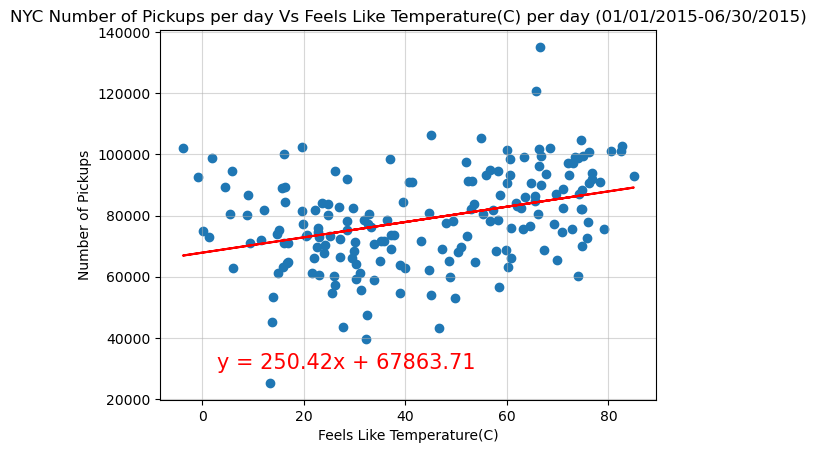

In [23]:
#Create plot showing relationship between number of pickups and feels like temp
x_values= nyc_merge_df["Feels Like Temperature(C)"]
y_values= nyc_merge_df["Number of Pickups"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,30000),fontsize=15,color="red")
plt.title("NYC Number of Pickups per day Vs Feels Like Temperature(C) per day (01/01/2015-06/30/2015)")
plt.ylabel("Number of Pickups")
plt.xlabel("Feels Like Temperature(C)")
plt.grid(True, alpha= 0.5)
print(f"The r-value is: {rvalue}")


# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [24]:
#Does different boroughs? Ryan
#How do the different borughs compare with pickups?
borough_df= uber_df[["borough", "pickups"]]
borough_df= borough_df.rename(columns={"borough": "NYC Borough"}|{"pickups":"Number of Pickups"})
borough_df= borough_df.groupby("NYC Borough").agg({"Number of Pickups": "sum"}).reindex()
borough_df.head

<bound method NDFrame.head of                Number of Pickups
NYC Borough                     
Bronx                     220047
Brooklyn                 2321035
EWR                          105
Manhattan               10367841
Queens                   1343528
Staten Island               6957>

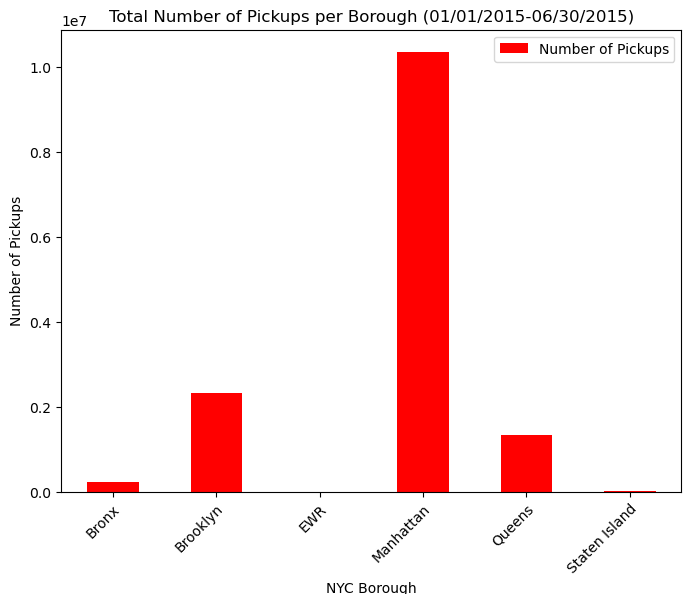

In [25]:
#Plot to show the total pickups in each Borough
figure1 = borough_df.plot(kind="bar", facecolor="red", figsize=(8,6),
                                title="Total Number of Pickups per Borough (01/01/2015-06/30/2015)",
                                xlabel="NYC Borough",
                                ylabel="Number of Pickups")

# Configure x-tick rotation
xticklabels = borough_df.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)


plt.show()

In [26]:
# Time of day effect pickups? - Fidel

In [27]:
#Difference in Weekdays vs Weekends? - James

In [28]:
#How do Holidays affect pickups? - Fidel Carillo Average holiday pickups vs non holiday with rain and vs non holiday without Difference in Holiday pickups? - Fidel

In [29]:
# Correlation and Regression

## Analysis